In [1]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import scipy
from scipy import signal

# Import and Plot Raw Data #

Text(0.5, 0, 'time(s)')

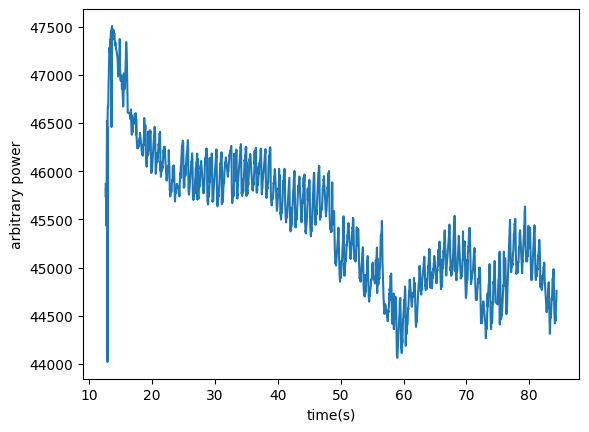

In [2]:
my_data = genfromtxt('heartdataandrejz.csv', delimiter=',')
time = my_data[:,0]
power = my_data[:,1]
plt.plot(time,power)
#plt.title("Andrzej's Data")
plt.ylabel("arbitrary power")
plt.xlabel("time(s)")



# Slicing Data(not needed) #

In [3]:

# start = 40
# end = 50
# indexstart = np.where(np.round(time) == start)[0][0]
# indexend = np.where(np.round(time) == end)[0][-1]

# time = time[indexstart:indexend]
# power = power[indexstart:indexend]

# plt.plot(time,power)

# #plt.title("Andrzej's Data Zoomed In")
# plt.ylabel("arbitrary power")
# plt.xlabel("time(s)")



# Smoothing and Differentiating Data #

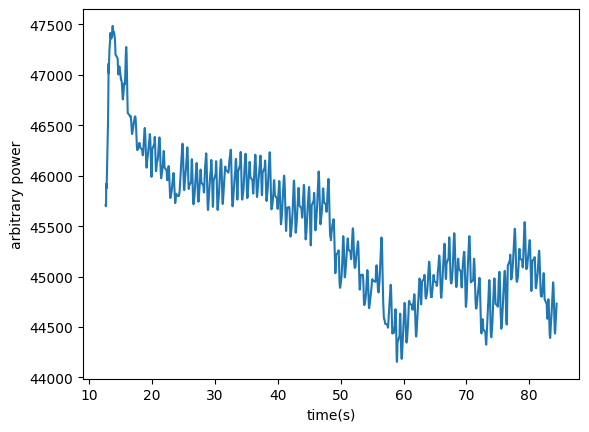

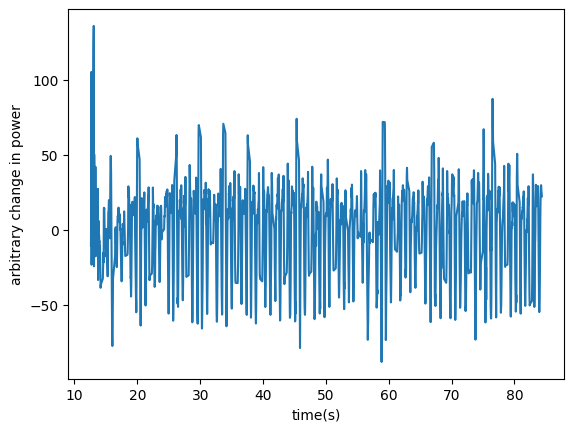

In [4]:

power_smooth = signal.savgol_filter(power, window_length=20, polyorder=3, mode="nearest")
plt.plot(time, power_smooth)
plt.ylabel("arbitrary power")
plt.xlabel("time(s)")
plt.show()


df_power = np.gradient(power_smooth)
plt.plot(time, df_power)
plt.ylabel("arbitrary change in power")
plt.xlabel("time(s)")
plt.show()

# Testing the fourier transform function on a sine wave #

In [5]:
# ## Test sine wave ##

# x = np.linspace(0,2,500)
# k = 10
# y = np.sin(2* np.pi * k * x) + 1000  #failed when the vertical shift was included

# plt.plot(x,y)
# plt.show()


# ##fourier Transform Test 
# sampletime = x[1]-x[0]
# samplerate = 1/sampletime

# fty = np.fft.fft(y)
# values= np.arange(int(len(y)))

# timePeriod  = len(y)/samplerate

# ftx = values/timePeriod


# plt.plot(ftx,abs(fty))

# #plt.xlim([0,10])

# Performing the fourier Transform and finding the heart rate #

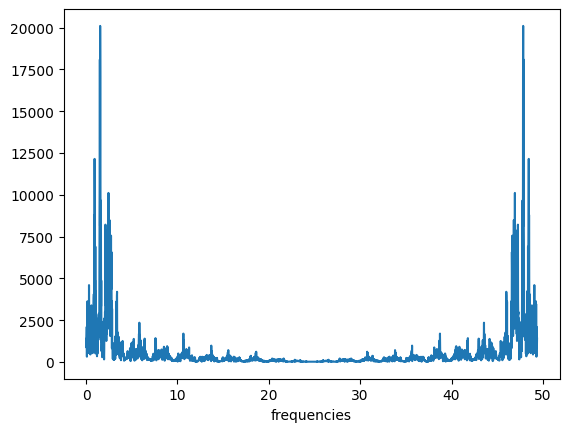

Andrzej's Heart Rate is 92 beats per minute


In [6]:
period = time[1] - time[0]
sampfreq = 1/period


fourierTransform = np.fft.fft(df_power)
powercount = len(power)
values     = np.arange(int(powercount))

timePeriod = powercount/sampfreq

frequencies = values/timePeriod

plt.plot(frequencies, abs(fourierTransform))
plt.xlabel("frequencies")
plt.show()


heartrateindex = np.where(abs(fourierTransform) == max(abs(fourierTransform)))
heartrateindex = heartrateindex[0][0]

heartrate = frequencies[heartrateindex]
#print(heartrate)
print('Andrzej\'s Heart Rate is {:.0f} beats per minute'.format( heartrate * 60))